## Аналитика компании "Мегалайн"
«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Шаг 1. Изучить общую информацию

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [3]:
d_users = pd.read_csv('users.csv', parse_dates=['reg_date'])
print(d_users.info())
d_users.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [4]:
d_calls = pd.read_csv('calls.csv', parse_dates=['call_date'])
print(d_calls.info())
d_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
d_net = pd.read_csv('/datasets/internet.csv', parse_dates=['session_date'], index_col=0)
print(d_net.info())
d_net.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB
None


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [5]:
d_sms = pd.read_csv('/datasets/messages.csv', parse_dates=['message_date'])
print(d_sms.info())
d_sms.head(16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [6]:
d_tariffs = pd.read_csv('/datasets/tariffs.csv')
d_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Вывод**

На данном этапе были загружены 5 таблиц с данными.

Таблица "tariffs" содержит общую информацию об имеющихся тарифах и стоимости услуг внутри каждого из тарифов.

Таблица "users" содержит информацию о 500 клиентах "Мегалайна". В каждом столбце, кроме "churn_date", 500 значений, что может говорить о том, что пропусков в этой таблице нет.

Таблица "calls" содержит 4 столбца по 202607 значений. Можно утверждать, что в этой таблице пропусков нет.

Талица "internet" содержит 5 столбцов, в каждом 149396 значений. Однако первый столбец этой таблицы не имеет названия и, возможно, хранит в себе номера строк. В ходе дальнейшей работы это будет проверено и, при необходимости, этот столбец будет удалён.

Таблица "messages" содержит 123036 строк. В каждом столбце количетсво строк одинаковое. 

На основе данных таблиц будет произведён дальнейший анализ.

# Шаг 2. Предобработка данных

### Исправление ошибок

In [7]:
# округление израсходованных минут, согласно корпоративным стандартам
d_calls['duration'] = d_calls['duration'].apply(np.ceil)

In [8]:
# добавление столбца с значением месяц
d_calls.insert(2,'month', pd.DatetimeIndex(d_calls['call_date']).month)
#d_calls.insert(2,'month', d_calls['call_date'].astype('datetime64[M]'))
d_sms.insert(2,'month', pd.DatetimeIndex(d_sms['message_date']).month)
d_net.insert(3,'month', pd.DatetimeIndex(d_net['session_date']).month)

In [9]:
#display(d_net[d_net['mb_used'] < 1])
#13% сессий иметют трафик 0.0 
#d_net.groupby('user_id').count()
d_0net = d_net[d_net['mb_used'] < 0.1].groupby('user_id')['id'].count()
d_1net = d_net.groupby('user_id')['id'].count()
zero_session = []
for i in range (1000,1500):
    try:
        t= d_0net[i]/d_1net[i]*100
        zero_session.append(t)
    except:
        zero_session.append(0)
zero_session= pd.DataFrame(data= zero_session, columns=['pers'])

zero_session['pers'].value_counts(bins=4)
#zero_session.loc[zero_session['pers'] == 0].count() #пользователей, кто не пользовался интернетом 6 

(12.5, 18.75]                    282
(-0.026000000000000002, 6.25]    128
(6.25, 12.5]                      49
(18.75, 25.0]                     41
Name: pers, dtype: int64

Таблица "internet" содержит столбец, дублирующий номера строк. Он был удалён. Далее значения длительности телефонных разговоров были округлены согласно корпоративным стандартам.
Были изучены значения в столбце used_mb, показывающим объём потраченного за сессию интернет-трафика (в мегабайтах). Отмечено, что около 13% значений менее 0,1. Будем считать, что в данных сессиях объём передаваемых данных был столь незначителен, что им можно пренебречь. 

### Добавление рассчётов

Посчитайте для каждого пользователя:

    количество сделанных звонков и израсходованных минут разговора по месяцам;
    количество отправленных сообщений по месяцам;
    объем израсходованного интернет-трафика по месяцам;
    помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [12]:
# Звонки
calls = d_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
calls.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls.head()

,user_id,month,calls_count,calls_sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


In [27]:
calls.user_id.nunique()

492

In [14]:
# СМС
messages = d_sms.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages.columns = ['user_id', 'month', 'messages_count']
messages.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [26]:
messages.user_id.nunique()

426

In [16]:
# Интернет
internet = d_net.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet.columns = ['user_id', 'month', 'mb_sum_internet']
internet.head()

,user_id,month,mb_sum_internet
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [25]:
internet.user_id.nunique()

497

In [24]:
d_users.user_id.nunique()

500

In [21]:
revenue = calls.merge(messages, on=['user_id', 'month'], how='outer')
revenue = revenue.merge(internet, on=['user_id', 'month'], how='outer')
revenue = revenue.merge(d_users[['user_id', 'tariff', 'city']], on='user_id', how='left')
revenue

,user_id,month,calls_count,calls_sum,messages_count,mb_sum_internet,tariff,city
0,1000,5,22.0,159.0,22.0,2253.49,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,23233.77,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,14003.64,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,14055.93,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,14568.91,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30,smart,Санкт-Петербург
3210,1489,10,NaN,NaN,21.0,19559.44,smart,Санкт-Петербург
3211,1489,11,NaN,NaN,20.0,17491.56,smart,Санкт-Петербург
3212,1489,12,NaN,NaN,35.0,17322.51,smart,Санкт-Петербург


In [23]:
revenue.user_id.nunique()

498

In [28]:
d_users[d_users['user_id'].isin(revenue['user_id'].unique()) == False]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Они отключились почти сразу после подключения. Они действительно могли просто не успеть воспользоваться услугами связи. Т.е., их отсуствие в итоговой тблице нормально и не говорит о том, что мы ошиблись.

In [29]:
# создадим новые, объединённые таблицы, в которых будут храниться данные пользователей и их расходы по статьям
d_c_u = d_users.merge(d_calls, how = 'outer', on = ['user_id'])
d_c_u = d_c_u.drop(columns=['age' ,'id','call_date'])
d_s_u = d_users.merge(d_sms, how = 'outer', on = ['user_id'])
d_s_u = d_s_u.drop(columns=['age', 'id','message_date'])
d_n_u = d_users.merge(d_net, how = 'outer', on = ['user_id'])
d_n_u = d_n_u.drop(columns=['age', 'id', 'session_date'])

In [30]:
data = d_users.copy()

In [31]:
# в таблице d_c_u хранятся значения количества звонков и потраченных минут
for id in range(1000,1500):
    for month in range(1,13):
        d_c_u.loc[(d_c_u['user_id']== id) & (d_c_u['month']== month),'month_count']= d_c_u.loc[(d_c_u['user_id']== id) & (d_c_u['month']== month)]['duration'].count()
        d_c_u.loc[(d_c_u['user_id']== id) & (d_c_u['month']== month),'month_duration']= d_c_u.loc[(d_c_u['user_id']== id) & (d_c_u['month']== month)]['duration'].sum()
d_c_u = d_c_u.drop(columns=['duration']).drop_duplicates().sort_values(by=['user_id', 'month'])


In [32]:
d_c_u['month_count'] = d_c_u['month_count'].fillna(0)
d_c_u['month_duration'] = d_c_u['month_duration'].fillna(0)

In [33]:
# в таблице d_s_u хранятся значения количества отправленных сообщений по месяцам
for id in range(1000,1500):
    for month in range(1,13):
        d_s_u.loc[(d_s_u['user_id']== id) & (d_s_u['month']== month),'month_sms'] = d_s_u.loc[(d_s_u['user_id']== id) & (d_s_u['month']== month)]['month'].count()   
d_s_u = d_s_u.drop_duplicates().sort_values(by=['user_id', 'month'])#.fillna(0)

In [34]:
d_s_u['month_sms'] = d_s_u['month_sms'].fillna(0)

In [35]:
# в таблице d_n_u хранятся объем израсходованного интернет-трафика по месяцам (в Мб.)
for id in range(1000,1500):
    for month in range(1,13):
        d_n_u.loc[(d_n_u['user_id']== id) & (d_n_u['month']== month),'month_mg']=(np.ceil(d_n_u.loc[(d_n_u['user_id']== id) & (d_n_u['month']== month)]['mb_used'].sum()))
d_n_u = d_n_u.drop(columns=['mb_used']).drop_duplicates().sort_values(by=['user_id', 'month'])

In [36]:
# Проверим значения на превышение пакетного предложения по количеству звонков
def call_limits(row):
    # Функция проверяет, есть ли превышение разговорных минут. 
    # В случае превышения функция возвращает сумму, на которую были предоставлены услуги
    tariff = row['tariff']
    if tariff == 'smart':
        if row['month_duration'] > 500:
            return 3*(row['month_duration']-500)
        else:
            return 0
    else:
        if row['month_duration'] > 3000:
            return 1*(row['month_duration']-3000)
        else:
            return 0

d_c_u['call_profit'] = d_c_u.apply(call_limits, axis =1)

In [37]:
# Проверим значения на превышение пакетного предложения по количеству смс
def sms_limits(row):
    # Функция проверяет, есть ли превышение количества смс. 
    # В случае превышения функция возвращает сумму, на которую были предоставлены услуги
    tariff = row['tariff']
    if tariff == 'smart':
        if row['month_sms'] > 50:
            return 3*(row['month_sms']-50)
        else:
            return 0
    else:
        if row['month_sms'] > 1000:
            return 1*(row['month_sms']-1000)
        else:
            return 0

d_s_u['sms_profit'] = d_s_u.apply(sms_limits, axis =1)

In [38]:
d_s_u['sms_profit'] = d_s_u['sms_profit'].fillna(0)

In [39]:
# Проверим значения на превышение пакетного предложения по количеству Mb
def mb_limits(row):
    # Функция проверяет, есть ли превышение количества Mb. 
    # В случае превышения функция возвращает сумму, на которую были предоставлены услуги
    tariff = row['tariff']
    if tariff == 'smart':
        if row['month_mg'] > 15360:
            return 200*(np.ceil((row['month_mg']-15360)/1024))
        else:
            return 0
    else:
        if row['month_mg'] > 30720:
            return 150*(np.ceil((row['month_mg']-30720)/1024))
        else:
            return 0

d_n_u['net_profit'] = d_n_u.apply(mb_limits, axis =1)

In [40]:
d_n_u['month_mg'] = d_n_u['month_mg'].fillna(0)

In [41]:
data = data.merge(d_n_u, how='right', on = ['user_id','churn_date','city','first_name', 'reg_date',
                                          'last_name', 'tariff'])
data = data.drop(columns=['month_mg'])
#data_users = users.merge(tariffs, left_on='tariff', right_on='tariff_name', how='outer')

In [44]:
data.user_id.nunique()

500

In [45]:
# Пришлось поставить костыль, т.к. так и не понял, как объединить мои таблицы чтобы всё завелось.
data.loc[data['user_id']==1128,'month'] = 12
data.loc[data['user_id']==1371,'month'] = 12

In [46]:
data = data[data['month'].isna()==False]

In [48]:
kornilov = d_c_u[d_c_u['user_id']== 1273]
kornilov = kornilov.drop(columns=['month_count','month_duration','call_profit'])

In [49]:
data = data.merge(kornilov, how = 'outer', on = ['user_id','city','first_name','last_name','churn_date',
                                                'reg_date', 'tariff','month'])

In [50]:
data['net_profit'] = data['net_profit'].fillna(0)

In [51]:
data = data.merge(d_c_u, how='left', on = ['user_id','churn_date','city','first_name', 'reg_date',
                                          'last_name', 'tariff','month'])
data = data.drop(columns=['month_count', 'month_duration'])
data['call_profit'] = data['call_profit'].fillna(0)

In [52]:
data = data.merge(d_s_u, how='left', on = ['user_id','churn_date','city','first_name', 'reg_date',
                                          'last_name', 'tariff','month'])
data = data.drop(columns=['month_sms'])
data['sms_profit'] = data['sms_profit'].fillna(0)

In [55]:
data.user_id.nunique()

500

In [56]:
# В users добавим помесячную выручку от каждого пользователя
def month_profit (row):
    '''
    Функция считает доход для от клиента по тарифу и параметрам тарифа
    row - строка, из которой берётся индекс клиента и тариф, которым он пользуется
    '''
    tariff = row['tariff']
    profit = row['call_profit'] + row['sms_profit'] + row['net_profit']
    if tariff == 'smart':
        profit += 550
    else:
        profit += 1950
    return profit

data['total_profit']= data.apply(month_profit, axis =1)

In [57]:
data = data.drop(columns=['call_profit', 'sms_profit', 'net_profit'])

In [58]:
# Удостоверимся, что в столбце 'user_id' нет пропусков.
#data['user_id'].unique()
data.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_profit
2916,1456,40.0,NaN,Санкт-Петербург,Мануэла,Андропова,2018-08-25,smart,9.0,2118.0
834,1130,58.0,NaN,Тюмень,Инара,Крюкова,2018-04-01,smart,9.0,2641.0
2590,1404,61.0,NaN,Иркутск,Роберт,Уваров,2018-04-18,smart,8.0,950.0
2158,1340,50.0,NaN,Пенза,Тимофей,Алютин,2018-01-30,smart,11.0,867.0
1066,1168,28.0,NaN,Кострома,Лилия,Ананьева,2018-01-24,ultra,11.0,2250.0


### Вывод


Были проверены значения количества интернет-трафика. Часть данных имеют трафик менее 0,1 Мб. Однако, аномальных значений обнаружено не было.

Были созданы таблицы d_c_u, d_s_u, d_n_u, d которых сохранены количество и длительность звонков, количество смс и интернет трафика для каждого клиента. В таблице data сохранена помесячная выручка с каждого клиента.

In [68]:
data.user_id.nunique()

500

# Шаг 3. Анализ данных.

Посчитаем средние значения количества звонков, среднее количества потраченных минут, дисперсию и стандартное отклонение для выборок обоих тарифов. Построим гистограммы.

In [49]:
#d_c_u['user_id'].unique()

Тариф Smart
Среднее значение количетсва звонков по тарифу Smart для имеющейся выборки: 58.57
Рассмотрим общую статистику по количеству потраченных минут в месяц среди клиентов тарифа Smart в данной выборке
count    2225.000000
mean      418.686292
std       189.656900
min         0.000000
25%       284.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: month_duration, dtype: float64
Имея выборку клиентов тарифа Smart, мы можем рассчитать приближённо значение дисперсии генеральной совокупности.
Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Smart равно 35969.73967262146
В задании указано, что необходимо вывести стандартное отклонение. Отметим, что при вызове функции describe(), стандартное отклонение уже было выведено.
Повторим вывод стандартного отклонения для клиентов тарифа Smart 189.65689988139493


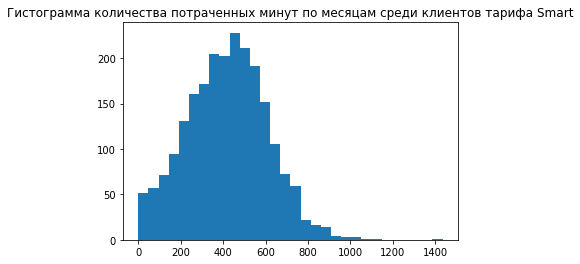


Тариф Ultra
Среднее значение количетсва звонков по тарифу Ultra для имеющейся выборки: 75.54
Рассмотрим общую статистику по количеству потраченных минут в месяц среди клиентов тарифа Ultra в данной выборке
count     957.000000
mean      542.031348
std       308.978539
min         0.000000
25%       308.000000
50%       525.000000
75%       756.000000
max      1673.000000
Name: month_duration, dtype: float64
Имея выборку клиентов тарифа Ultra, мы можем рассчитать приближённо значение дисперсии генеральной совокупности.
Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Ultra равно 95467.73751000119
В задании указано, что необходимо вывести стандартное отклонение. Отметим, что при вызове функции describe(), стандартное отклонение уже было выведено.
Повторим вывод стандартного отклонения для клиентов тарифа Smart 308.97853891492394


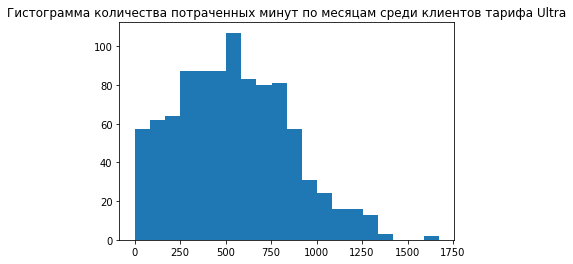

In [67]:
print('Тариф Smart')
print('Среднее значение количетсва звонков по тарифу Smart для имеющейся выборки:',round(d_c_u.loc[d_c_u['tariff']== 'smart','month_count'].mean(),2))

print('Рассмотрим общую статистику по количеству потраченных минут в месяц среди клиентов тарифа Smart в данной выборке')
print(d_c_u.loc[d_c_u['tariff']== 'smart', 'month_duration'].describe())

variance_est_smart = np.var(d_c_u.loc[d_c_u['tariff']== 'smart', 'month_duration'], ddof=1)
print('Имея выборку клиентов тарифа Smart, мы можем рассчитать приближённо значение дисперсии генеральной совокупности.')
print('Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Smart равно', variance_est_smart)
standard_deviation_est_smart = np.sqrt(variance_est_smart)

print('В задании указано, что необходимо вывести стандартное отклонение. Отметим, что при вызове функции describe(), стандартное отклонение уже было выведено.')
print('Повторим вывод стандартного отклонения для клиентов тарифа Smart',standard_deviation_est_smart)

plt.hist(d_c_u.loc[d_c_u['tariff']== 'smart', 'month_duration'],bins = 30)
plt.title('Гистограмма количества потраченных минут по месяцам среди клиентов тарифа Smart')
plt.show()


print()
print('Тариф Ultra')
print('Среднее значение количетсва звонков по тарифу Ultra для имеющейся выборки:',round(d_c_u.loc[d_c_u['tariff']== 'ultra','month_count'].mean(),2))

print('Рассмотрим общую статистику по количеству потраченных минут в месяц среди клиентов тарифа Ultra в данной выборке')
print(d_c_u.loc[d_c_u['tariff']== 'ultra', 'month_duration'].describe())

variance_est_ultra = np.var(d_c_u.loc[d_c_u['tariff']== 'ultra', 'month_duration'], ddof=1)
print('Имея выборку клиентов тарифа Ultra, мы можем рассчитать приближённо значение дисперсии генеральной совокупности.')
print('Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Ultra равно', variance_est_ultra)
standard_deviation_est_ultra = np.sqrt(variance_est_ultra)

print('В задании указано, что необходимо вывести стандартное отклонение. Отметим, что при вызове функции describe(), стандартное отклонение уже было выведено.')
print('Повторим вывод стандартного отклонения для клиентов тарифа Smart',standard_deviation_est_ultra)

plt.hist(d_c_u.loc[d_c_u['tariff']== 'ultra', 'month_duration'],bins = 20)
plt.title('Гистограмма количества потраченных минут по месяцам среди клиентов тарифа Ultra')
plt.show()

In [71]:
d_c_u.pivot_table(index= 'tariff', values= 'month_duration', aggfunc= ['mean', 'var','std'])

,mean,var,std
,month_duration,month_duration,month_duration
tariff,,,
smart,418.686292,35969.739673,189.656900
ultra,542.031348,95467.737510,308.978539


Отметим, что гистограммы показывают наличие небольшой скошенности у обеих выборок. Однако, в выборке клиентов тарифа Smart скошенность влево, в то время, как в выборке клиентов тариа Ultima присутствует небольшая скошенность вправо.

Посчитаем средние значения количества смс, дисперсию и стандартное отклонение для выборок обоих тарифов. Построим гистограммы.

Тариф Smart
Рассмотрим общую статистику по количеству потраченных SMS в месяц среди клиентов тарифа Smart в данной выборке
count    1971.000000
mean       37.753932
std        27.131206
min         0.000000
25%        16.000000
50%        33.000000
75%        54.500000
max       143.000000
Name: month_sms, dtype: float64
Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Smart равно 736.1023639730405
Cтандартное отклонение для клиентов тарифа Smart 27.131206459961202


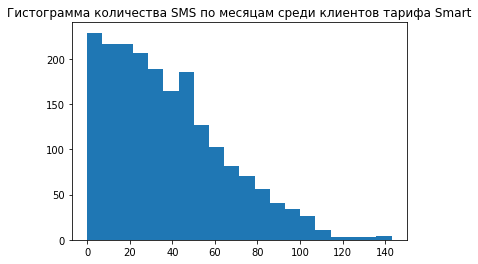


Тариф Ultra
Рассмотрим общую статистику по количеству потраченных SMS в месяц среди клиентов тарифа Ultra в данной выборке
count    820.000000
mean      59.296341
std       46.432366
min        0.000000
25%       22.000000
50%       49.000000
75%       85.000000
max      224.000000
Name: month_sms, dtype: float64
Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Ultra равно 2155.9645775633585
Cтандартное отклонение для клиентов тарифа Ultra 46.43236562531957


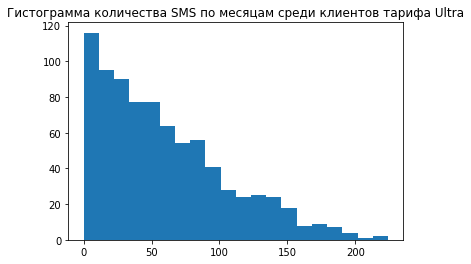

In [51]:
print('Тариф Smart')
print('Рассмотрим общую статистику по количеству потраченных SMS в месяц среди клиентов тарифа Smart в данной выборке')
print(d_s_u.loc[d_s_u['tariff']== 'smart', 'month_sms'].describe())

variance_est_smart = np.var(d_s_u.loc[d_s_u['tariff']== 'smart', 'month_sms'], ddof=1)
print('Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Smart равно', variance_est_smart)
standard_deviation_est_smart = np.sqrt(variance_est_smart)

print('Cтандартное отклонение для клиентов тарифа Smart',standard_deviation_est_smart)

plt.hist(d_s_u.loc[d_s_u['tariff']== 'smart', 'month_sms'],bins = 20)
plt.title('Гистограмма количества SMS по месяцам среди клиентов тарифа Smart')
plt.show()


print()
print('Тариф Ultra')
print('Рассмотрим общую статистику по количеству потраченных SMS в месяц среди клиентов тарифа Ultra в данной выборке')
print(d_s_u.loc[d_s_u['tariff']== 'ultra', 'month_sms'].describe())

variance_est_smart = np.var(d_s_u.loc[d_s_u['tariff']== 'ultra', 'month_sms'], ddof=1)
print('Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Ultra равно', variance_est_smart)
standard_deviation_est_smart = np.sqrt(variance_est_smart)

print('Cтандартное отклонение для клиентов тарифа Ultra',standard_deviation_est_smart)

plt.hist(d_s_u.loc[d_s_u['tariff']== 'ultra', 'month_sms'],bins = 20)
plt.title('Гистограмма количества SMS по месяцам среди клиентов тарифа Ultra')
plt.show()




Отметим, что гистограммы показывают наличие скошенности у обеих выборок. При этом у обеих выборок прослеживается скошенность вправо.

Посчитаем средние значения количество потраченного интернет-трафика, дисперсию и стандартное отклонение для выборок обоих тарифов. Построим гистограммы.

Тариф Smart
Рассмотрим статистику по количеству потраченного интернет-трафика в месяц среди клиентов тарифа Smart в выборке
count     2229.000000
mean     16208.872589
std       5870.482897
min          0.000000
25%      12644.000000
50%      16507.000000
75%      20043.000000
max      38553.000000
Name: month_mg, dtype: float64
Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Smart равно 34462569.44246641
Cтандартное отклонение для клиентов тарифа Smart 5870.482896871978


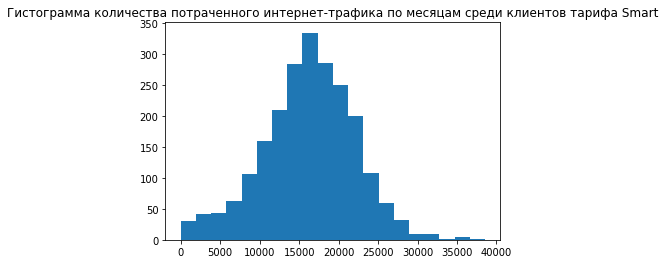


Тариф Ultra
Рассмотрим статистику по количеству потраченного интернет-трафика в месяц среди клиентов тарифа Ultra в выборке
count      977.000000
mean     19628.727738
std       9972.617374
min          0.000000
25%      11920.000000
50%      19377.000000
75%      26866.000000
max      49746.000000
Name: month_mg, dtype: float64
Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Ultra равно 99453097.29055154
Cтандартное отклонение для клиентов тарифа Ultra 9972.617374117566


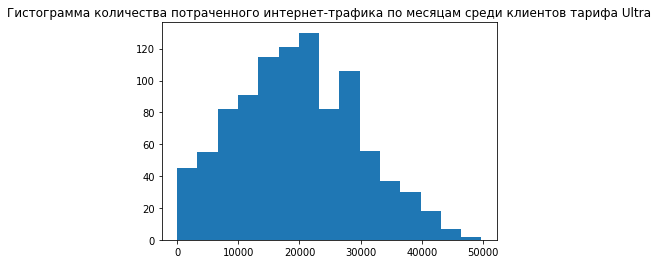

In [52]:
print('Тариф Smart')
print('Рассмотрим статистику по количеству потраченного интернет-трафика в месяц среди клиентов тарифа Smart в выборке')
print(d_n_u.loc[d_n_u['tariff']== 'smart', 'month_mg'].describe())

variance_est_smart = np.var(d_n_u.loc[d_n_u['tariff']== 'smart', 'month_mg'], ddof=1)
print('Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Smart равно', variance_est_smart)
standard_deviation_est_smart = np.sqrt(variance_est_smart)

print('Cтандартное отклонение для клиентов тарифа Smart',standard_deviation_est_smart)

plt.hist(d_n_u.loc[d_n_u['tariff']== 'smart', 'month_mg'],bins = 20)
plt.title('Гистограмма количества потраченного интернет-трафика по месяцам среди клиентов тарифа Smart')
plt.show()


print()
print('Тариф Ultra')
print('Рассмотрим статистику по количеству потраченного интернет-трафика в месяц среди клиентов тарифа Ultra в выборке')
print(d_n_u.loc[d_n_u['tariff']== 'ultra', 'month_mg'].describe())

variance_est_smart = np.var(d_n_u.loc[d_n_u['tariff']== 'ultra', 'month_mg'], ddof=1)
print('Приближённое значение дисперсии генеральной совокупности клиентов с тарифом Ultra равно', variance_est_smart)
standard_deviation_est_smart = np.sqrt(variance_est_smart)

print('Cтандартное отклонение для клиентов тарифа Ultra',standard_deviation_est_smart)

plt.hist(d_n_u.loc[d_n_u['tariff']== 'ultra', 'month_mg'],bins = 15)
plt.title('Гистограмма количества потраченного интернет-трафика по месяцам среди клиентов тарифа Ultra')
plt.show()

Отметим, что гистограммы имет форму нормального распределения.

### Вывод

В данном разделе были рассчитаны средние значения, дисперсия и стандартное отклонение по количеству разговорных минут, смс и интернет-трафика по каждому из двух тарифов.

Можно отметить, что  распределение количества минут и интернет-трафика имеют вид нормального распределения с незначительной скошенностью. Тем самым значения среднего стремятся к медианным значениям. Распределение отправленных смс скошено вправо. 
Были получены значения.

Для тарифа Smart:

* Среднее значение количества минут разговора: 419
* Стандартное отклонение: 189
* Среднее значение количества потраченных смс: 38
* Стандартное отклонение: 27
* Среднее значение количества потраченного интернет- трафика: 16216
* Стандартное отклонение: 5862

Для тарифа Ultra:
* Среднее значение количества минут разговора: 545
* Стандартное отклонение: 307
* Среднее значение количества потраченных смс: 61
* Стандартное отклонение: 45
* Среднее значение количества потраченного интернет- трафика: 19669
* Стандартное отклонение: 9943


# Шаг 4. Проверьте гипотезы

В данном разделе будут выдвинуты и проверены две гипотезы о генеральной совокупности клиентов "Мегалайн".

Сформулируем первую нулевую гипотезу:
"Средние выручки пользователей от тарифов «Ультра» и «Смарт» равны"
Алтернативная гипотеза:
"Средняя выручка пользователей от тарифа «Ультра» больше, чем от тарифа «Смарт»"
критический уровень статистической значимости установим как 0.05 для всех исследований.

Общепринято, что нулеая гипотеза формулируется со знаком равенства. Альтернативная гипотеза была сформулирована как односторонняя для определения более выгодного для оператора тарифа.

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2,equal_var). Применим метод в данном исследовании.

In [65]:
print('Smart')
print(data.loc[data['tariff']== 'smart','total_profit'].describe())
smart_prof = data.loc[data['tariff']== 'smart','total_profit'].describe()
print('Ultra')
print(data.loc[data['tariff']== 'ultra','total_profit'].describe())
ultra_prof = data.loc[data['tariff']== 'ultra','total_profit'].describe()

Smart
count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: total_profit, dtype: float64
Ultra
count     984.000000
mean     2070.274390
std       376.358882
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: total_profit, dtype: float64


In [74]:
print('Smart')
print(data.loc[data['tariff']== 'smart','total_profit'])
smart_prof = data.loc[data['tariff']== 'smart','total_profit']
print('Ultra')
print(data.loc[data['tariff']== 'ultra','total_profit'])
ultra_prof = data.loc[data['tariff']== 'ultra','total_profit']

Smart
8       1150.0
9        550.0
10       550.0
11      1150.0
12      1550.0
         ...  
3200    1750.0
3201     550.0
3202    1150.0
3203    1513.0
3204     598.0
Name: total_profit, Length: 2229, dtype: float64
Ultra
0       1950.0
1       1950.0
2       1950.0
3       1950.0
4       1950.0
         ...  
3208    1950.0
3209    1950.0
3210    1950.0
3211    1950.0
3212    1950.0
Name: total_profit, Length: 984, dtype: float64


В вышеописанном методе присутствует необязательный параметр equal_var, задающий, считать ли равными дисперсии выборок. Применив метод .describe(), можно сделать вывод, что дисперсии не равны (хотя данный метод не показывает значение дисперсии, мы можем оценить её через параметр std). 
В итоге, понимая, что выборки разного размера(количество пользователей тарифов разное smart 351 ultra 149) установим параметр equal_var как False.

In [75]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    smart_prof, 
    ultra_prof,
    equal_var = False)

print('p-value: ', results.pvalue / 2)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value:  2.5690576841877785e-250
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти 44%, хотя среднее значение доходов от клиентов разных тарифов в имеющейся выборке отличается. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними значениями.

Вторая нулевая гипотеза:
"Средняя выручка пользотвателей из Москвы равна средней выручке клиентов из других регионов"
Альтернативная гипотеза:
"Средняя выручка пользователей из Москвы не равна средней выручке клиентов из других регионов"
критический уровень статистической значимости установим как 0.05 для всех исследований.

Согласно изученному материалу, нулеая гипотеза формулируется со знаком равенства. Альтернативная гипотеза была сформулирована как двусторонняя.

Изучим данные с пременением вышеописанного метода.

In [55]:
moscow_profit = data.loc[data['city']== 'Москва','total_profit']
russia_profit = data.loc[data['city']!= 'Москва','total_profit']

In [56]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    moscow_profit, 
    russia_profit,
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  0.5226670866411216
Не получилось отвергнуть нулевую гипотезу


Было получено, что вероятость равенства двух средних достаточно высока чтобы отбросить нулевую гипотезу, поэтому не представляется возможным утверждать, что средняя выручка пользователей из Москвы не равна средней выручке клиентов из других регионов.

### Вывод

В данном разделе были проверены две гипотезы исследования:

- о средней выручке пользователей тарифов
- о средней выручке пользователей из Москвы и регионов

В ходе работы над данным разделом были сформулированы и проверены следующие гипотезы:
"Средние выручки пользователей от тарифов «Ультра» и «Смарт» равны"
"Средняя выручка пользователей из Москвы равна средней выручке клиентов из других регионов"
Исходя из имеющихся данных, опровергнуть эти гипотезы не представляется возможным.

Хотя в данной выборке средняя выручка клиентов тарифа Ultra выше выручки от клиентов тарифа Smart, а выручка клиентов из Москвы больше выручки клиентов из других регионов, утверждать, что  в генеральной совокупности прослеживается аналогичная тенденция невозможно. 

# Шаг 5. Итоговый вывод.


Данное исследование основано на выборке клиентов компании «Мегалайн» с целью корректировки рекламного бюджета.

Выборка содержит данные 351 клиента тарифа smart и 149 клиентов тарифа ultra.

Выборка содержит данные о звонках, смс и интернет-трафике за 2018 год, которые хранятся в 5 датасетах.

На первом шаге была изучена общая информация о данных, на втором - данные были предобработаны, был удалён лишний столбец, была проведена проверка данных на наличие выбросов. В данном разделе был произведён расчёт количества совершенных звонков, израсходованных минут, отправленных смс и израсходованного интернет-трафика по месяцам для каждого клиента из выборки. Аналогично была рассчитана помесячная выручка.

На следующем этапе данные были проанализированы. 


Для тарифа Smart было получено:
Среднее значение количетсва звонков для имеющейся выборки: 59
Приближённое значение дисперсии генеральной совокупности звонков клиентов 35844.2
стандартное отклонения для звонков клиентов 189.3
Приближённое значение дисперсии количества смс равно 717.6
Cтандартное отклонение для количества смс 26.8
Приближённое значение дисперсии генеральной совокупности интернет-трафика равно 34360017.6
Cтандартное отклонение для интернет-трафика равно 5861.7

Для тарифа Ultra было получено:
Среднее значение количетсва звонков для имеющейся выборки: 76
Приближённое значение дисперсии генеральной совокупности звонков клиентов 94203.4
стандартное отклонения для звонков клиентов 306.9
Приближённое значение дисперсии количества смс равно 2109.7
Cтандартное отклонение для количества смс 45.9

Приближённое значение дисперсии генеральной совокупности интернет-трафика равно 98864546.6
Cтандартное отклонение для интернет-трафика равно 9943.1

На следующем шаге были сформулированы и проверены две гипотезы:
Средние выручки пользователей от тарифов «Ультра» и «Смарт» равны и её альтернативная гипотеза: Средняя выручка пользователей от тарифа «Ультра» больше, чем от тарифа «Смарт».
и
"Средняя выручка пользотвателей из Москвы равна средней выручке клиентов из других регионов" и её альтернативная гипотеза: «Средняя выручка пользователей из Москвы не равна средней выручке клиентов из других регионов"
В ходе анализа было получено, что опровергнуть обе гипотезы невозможно. Вероятность верности нулевых гипотез статистически значима.